In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

In [5]:
from src import data

In [13]:
df = pd.read_csv(
    f'{data.data_root}/external/imperial_college_interventions/interventions.csv',
    parse_dates=['Date effective']
)

In [17]:
df_dk = df[df.Country == 'Denmark']
df_dk

,Country,Type,Event,Date effective,Link,Unnamed: 5,Unnamed: 6
10,Denmark,Schools + Universities,Secondary schools shut and universities (prima...,2020-03-13,https://en.wikipedia.org/wiki/2020_coronavirus...,NaN,NaN
11,Denmark,Public events,"Bans of events >100 people, closes cultural in...",2020-12-03,https://nyheder.tv2.dk/samfund/2020-03-11-danm...,NaN,NaN
12,Denmark,Lockdown,Bans of gatherings of >10 people in public and...,2020-03-18,https://nyheder.tv2.dk/samfund/2020-03-11-danm...,https://en.wikipedia.org/wiki/2020_coronavirus...,NaN
13,Denmark,Social distancing encouraged,Limited use of public transport. All cultural ...,2020-03-13,https://politi.dk/coronavirus-i-danmark/senest...,NaN,NaN
14,Denmark,Self-isolating if ill,Everyone should stay at home if experiencing a...,2020-12-03,https://stps.dk/da/ansvar-og-retningslinjer/ve...,NaN,NaN


In [25]:
df_dk[['Date effective','Type']]

,Date effective,Type
10,2020-03-13,Schools + Universities
11,2020-12-03,Public events
12,2020-03-18,Lockdown
13,2020-03-13,Social distancing encouraged
14,2020-12-03,Self-isolating if ill


In [90]:
{'.': 'point',
 'o': 'circle',
 'v': 'triangle_down',
 '^': 'triangle_up',
 '<': 'triangle_left',
 '>': 'triangle_right',
 '1': 'tri_down',
 '2': 'tri_up',
 '3': 'tri_left',
 '4': 'tri_right',
 '8': 'octagon',
 's': 'square',
 'p': 'pentagon',
 '*': 'star',
 'h': 'hexagon1',
 'H': 'hexagon2',
 '+': 'plus',
 'x': 'x',
 'D': 'diamond',
 'd': 'thin_diamond',
 '|': 'vline',
 '_':'hline',
 'P': 'plus_filled',
 'X': 'x_filled',
 0: 'tickleft',
 1: 'tickright',
 2: 'tickup',
 3:'tickdown',
 4: 'caretleft',
 5: 'caretright',
 6: 'caretup',
 7: 'caretdown',
 8: 'caretleftbase',
 9: 'caretrightbase',
 10: 'caretupbase',
 11: 'caretdownbase',
 ',': 'pixel',}.keys()


dict_keys(['.', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ','])

In [89]:
plt.Line2D.markers

{'.': 'point',
 ',': 'pixel',
 'o': 'circle',
 'v': 'triangle_down',
 '^': 'triangle_up',
 '<': 'triangle_left',
 '>': 'triangle_right',
 '1': 'tri_down',
 '2': 'tri_up',
 '3': 'tri_left',
 '4': 'tri_right',
 '8': 'octagon',
 's': 'square',
 'p': 'pentagon',
 '*': 'star',
 'h': 'hexagon1',
 'H': 'hexagon2',
 '+': 'plus',
 'x': 'x',
 'D': 'diamond',
 'd': 'thin_diamond',
 '|': 'vline',
 '_': 'hline',
 'P': 'plus_filled',
 'X': 'x_filled',
 0: 'tickleft',
 1: 'tickright',
 2: 'tickup',
 3: 'tickdown',
 4: 'caretleft',
 5: 'caretright',
 6: 'caretup',
 7: 'caretdown',
 8: 'caretleftbase',
 9: 'caretrightbase',
 10: 'caretupbase',
 11: 'caretdownbase',
 'None': 'nothing',
 None: 'nothing',
 ' ': 'nothing',
 '': 'nothing'}

In [98]:
types = [
    'Schools + Universities',
     'Public events',
     'Lockdown',
     'Social distancing encouraged',
     'Self-isolating if ill',
     'Closure of cultural institutions',
     'Closure of restaurants',
     'Advice to work from home',
     'Keep distance from others',
     'Work from home',
     'Stay at home',
     'Public gatherings',
]
markers = ['.', '+', 'x', '*', 'v', '^', '<', '>',  'o', '1', '2', '3', '4', '8', 's', 'p',  'h', 'H', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ',']

type_markers = dict(zip(types, markers))

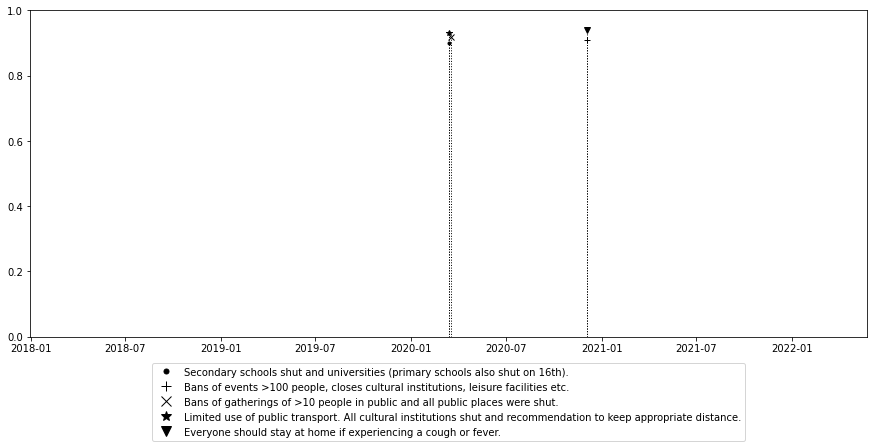

In [102]:
fig, ax = plt.subplots()
for i, (_, (date, t)) in enumerate(df_dk[['Date effective','Type']].iterrows()):
    ax.axvline(date, ymax=0.9+i*0.01, marker=type_markers[t], markevery=(1,1), lw=1, c='k', ls=':')

    
legend_elements = [
    plt.Line2D([0], [0], lw=0,marker=type_markers[t], color='k', label=event,
           markerfacecolor='k', markersize=10)
    for _,(date,t,event) in df_dk[['Date effective','Type','Event']].iterrows()
]


ax.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0.5, -0.2))